In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("tiktok.db")

cmd = \
    f"""
    SELECT video_title, sound_transcribed, upload_time, view
    FROM tiktok
    """ 
    
tiktoks = pd.read_sql_query(cmd, conn)
    
conn.close()

In [2]:
tiktoks.head()

,video_title,sound_transcribed,upload_time,view
0,EXCUSE MI THIS FANSERVICE THO 😩 #fyp #bts #bts...,NA,https://v16-webapp.tiktok.com/c236514e9e9afb02...,63900000
1,🐈Are you envious? #fy #kitty #cat #love #kiss,NA,https://v16-webapp.tiktok.com/19acdfd3ecbceb5f...,5400000
2,Fyp,Bonanza,https://v16-webapp.tiktok.com/e4d4117e4cd54b88...,3800000
3,100% the truth! ❤️,beautiful,https://v16-webapp.tiktok.com/66467801dcb7df68...,37900000
4,,NA,https://v16-webapp.tiktok.com/fd0801d14a758eef...,8300000


In [3]:
audio_tiktoks = tiktoks[tiktoks["sound_transcribed"] != "NA"]
audio_tiktoks.size

1328

In [4]:
audio_tiktoks["video_title"]

2                                                     Fyp
3                                      100% the truth! ❤️
7                                                        
8       she really tried to kick us off the plane.😂😂 @...
10             Roni does another TikTok #dance! #flipbook
                              ...                        
1083    Reply to @cajuncoonass337  #wafflehousewaitres...
1093    Give your girl 😜 this 💄😜see what happens 😁#for...
1094    You thought your boyfriend forgot about your a...
1096    #pov: Your boyfriend finds out that you cheate...
1098                                       #disco #dj #DJ
Name: video_title, Length: 332, dtype: object

In [5]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
for title in audio_tiktoks["video_title"][:10]:
    sid = SentimentIntensityAnalyzer()
    print(title)
    ss = sid.polarity_scores(title)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Fyp
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
100% the truth! ❤️
compound: 0.3802, neg: 0.0, neu: 0.536, pos: 0.464, 

compound: 0.0, neg: 0.0, neu: 0.0, pos: 0.0, 
she really tried to kick us off the plane.😂😂 @theskimaskgirl
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Roni does another TikTok #dance! #flipbook
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
#cute #dog
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
MANY PPL ASKED. <3 GTG TO SCHOOL #fyp #foryou #tysm #A+K
compound: 0.4404, neg: 0.0, neu: 0.775, pos: 0.225, 
How Tiktok behind the scenes are… 😂 @coreyscherer
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
He just want to hangout w me and all I do is bully him 😔 #foryou #fyp #baby #brother
compound: -0.4404, neg: 0.173, neu: 0.757, pos: 0.07, 
#trending #fyp #manga #anime #killua #animetiktok
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 


In [44]:
ss = [SentimentIntensityAnalyzer().polarity_scores(title) for title in audio_tiktoks["video_title"]]
ss[0]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [45]:
import collections

add_dict = collections.Counter({'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'neg': 0.0})

for s in ss:
    counter = collections.Counter(s)
    add_dict += counter
    dict_ss = dict(add_dict)

print(dict_ss)

{'neu': 272.90300000000013, 'pos': 21.861, 'compound': 25.401100000000003, 'neg': 6.236000000000001}


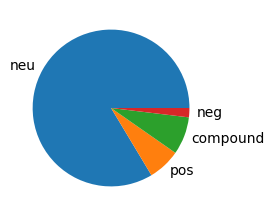

In [46]:
import matplotlib.pyplot as plt

plt.pie(dict_ss.values(), labels=dict_ss.keys())
plt.show()

In [81]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

titles = tiktoks["video_title"]
hashtags = hashtag_extract(titles)
hashtags[:10]

[['fyp', 'bts', 'btsarmy', 'btsconcert2021', 'taehyung', 'ptdonstage', 'btsv'],
 ['fy', 'kitty', 'cat', 'love', 'kiss'],
 [],
 [],
 [],
 [],
 ['catsoftikok'],
 [],
 [],
 []]

In [82]:
hashtags = sum(hashtags, [])
hashtags[:10]

['fyp',
 'bts',
 'btsarmy',
 'btsconcert2021',
 'taehyung',
 'ptdonstage',
 'btsv',
 'fy',
 'kitty',
 'cat']

In [106]:
import pandas as pd
series = pd.Series(hashtags)
freq = series.value_counts()
df = pd.DataFrame(freq[:10]).reset_index()
df.rename(columns={"index": "hashtag", 0: "frequency"})

,hashtag,frequency
0,fyp,220
1,foryou,148
2,cat,95
3,funny,75
4,viral,75
5,cute,58
6,dog,57
7,pet,51
8,foryoupage,49
9,fypシ,38
